<a href="https://colab.research.google.com/github/aps1070-2019/All_Labs_Answers/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### PCA - Project 3

Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. Note that all 12.5 marks for this project are attributed to the exercises. The tutorial is not marked.

Please fill out the following:


*   Your **name**: Harsh Panchal
*   Your **student number**:1005661507



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
   sep=',' )

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values


In [0]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

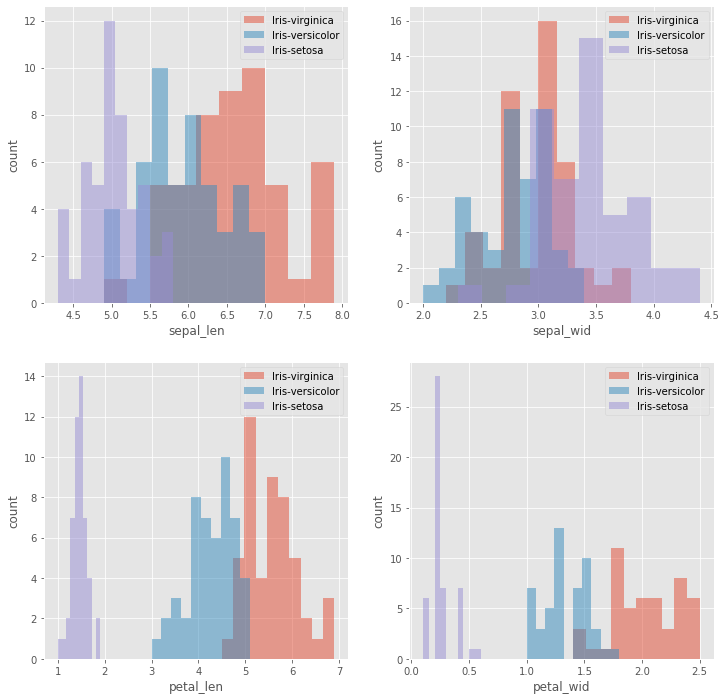

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

In [0]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [0]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [0]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues
C.shape

(4, 4)

#### Using Singular Vector Decomposition

In [0]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [0]:
n, m = X_std.shape
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?
-----> Yes

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

### Explained Variance

In [0]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

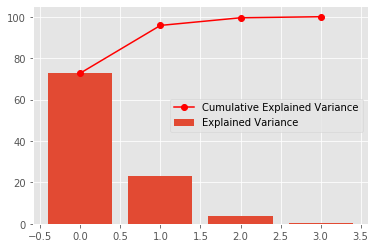

In [0]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?
-----> 2

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [0]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [0]:
projX = np.dot(X_std, W)
X.shape, projX.shape

((150, 4), (150, 2))

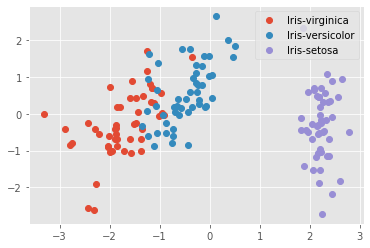

In [0]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=8f0253adc74406d22fe69a3ed256ee3347fd2bce3259e8bdebdb64b3badf4f23
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [0]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()


In [0]:
type(X), len(X)

(list, 1054)

In [0]:
type(X[0]), X[0].shape

(numpy.ndarray, (250, 250))

In [0]:
type(y), len(y)

(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Adrien_Brody


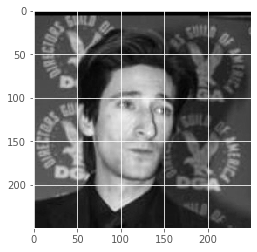

In [0]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

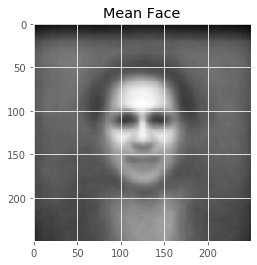

In [0]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
        
def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [0]:
eigenValues, eigenVectors, mean = pca(XMat, y)

Number of useful eigenBasis are:  298


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [0]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

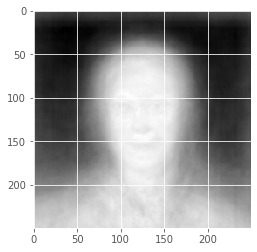

In [0]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

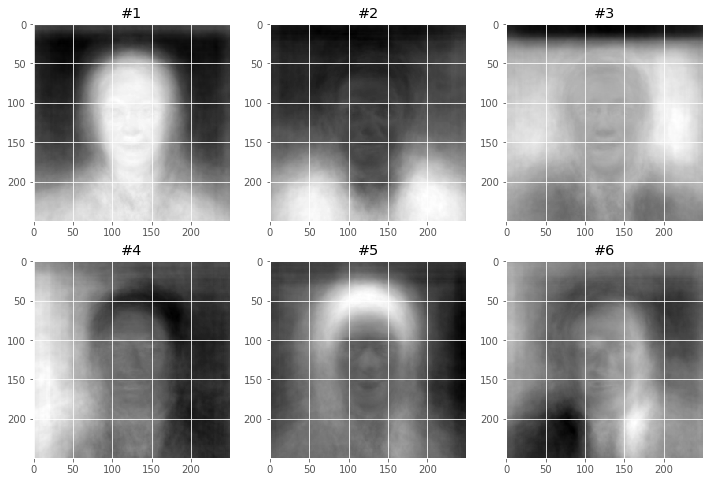

In [0]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

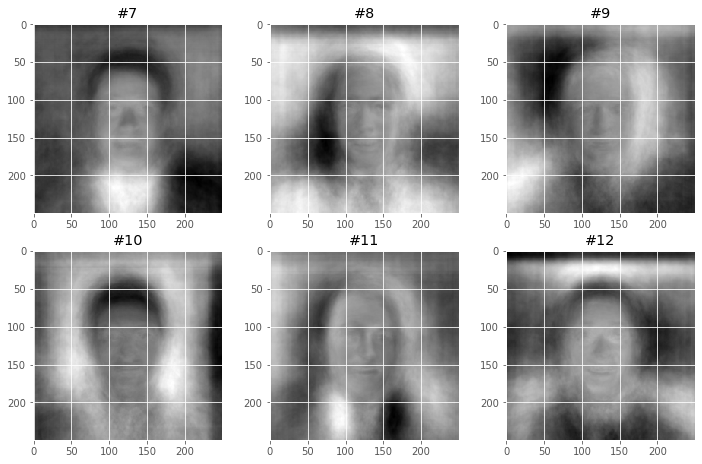

In [0]:
# print next 6 eigen faces
COUNT=12
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(6, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu
    

In [0]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

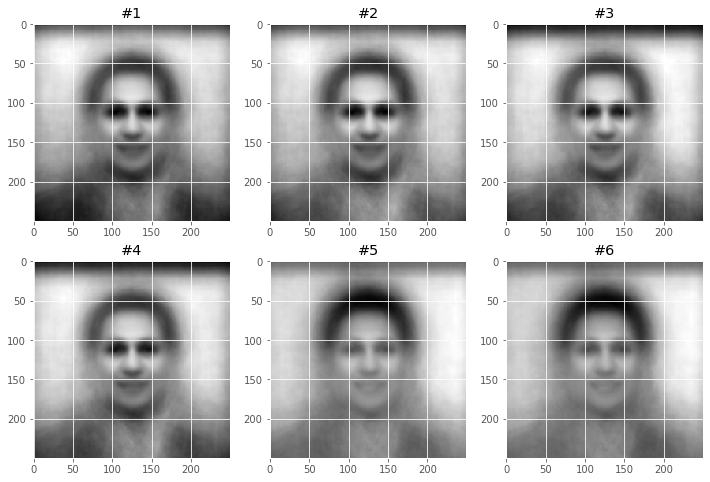

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

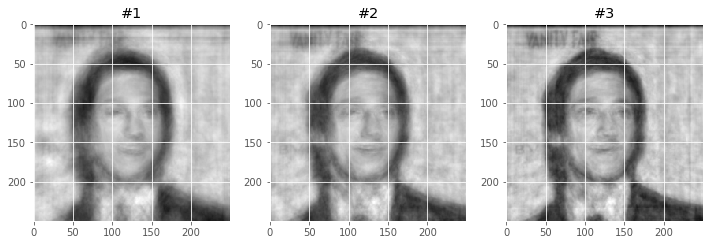

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

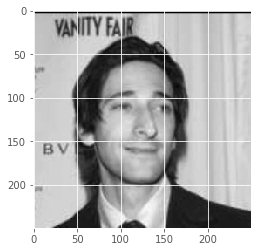

In [0]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[1]  
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5] -----> All patterns are different. There is no observable recurring trend. In some countries plot is decreasing one, in some countries it is increasing and in some countries we can see oscillatory pattern. 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

df = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv",index_col = 0, thousands= ',')
df.index.names=['Country']
df.columns.names=['Year']
df.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


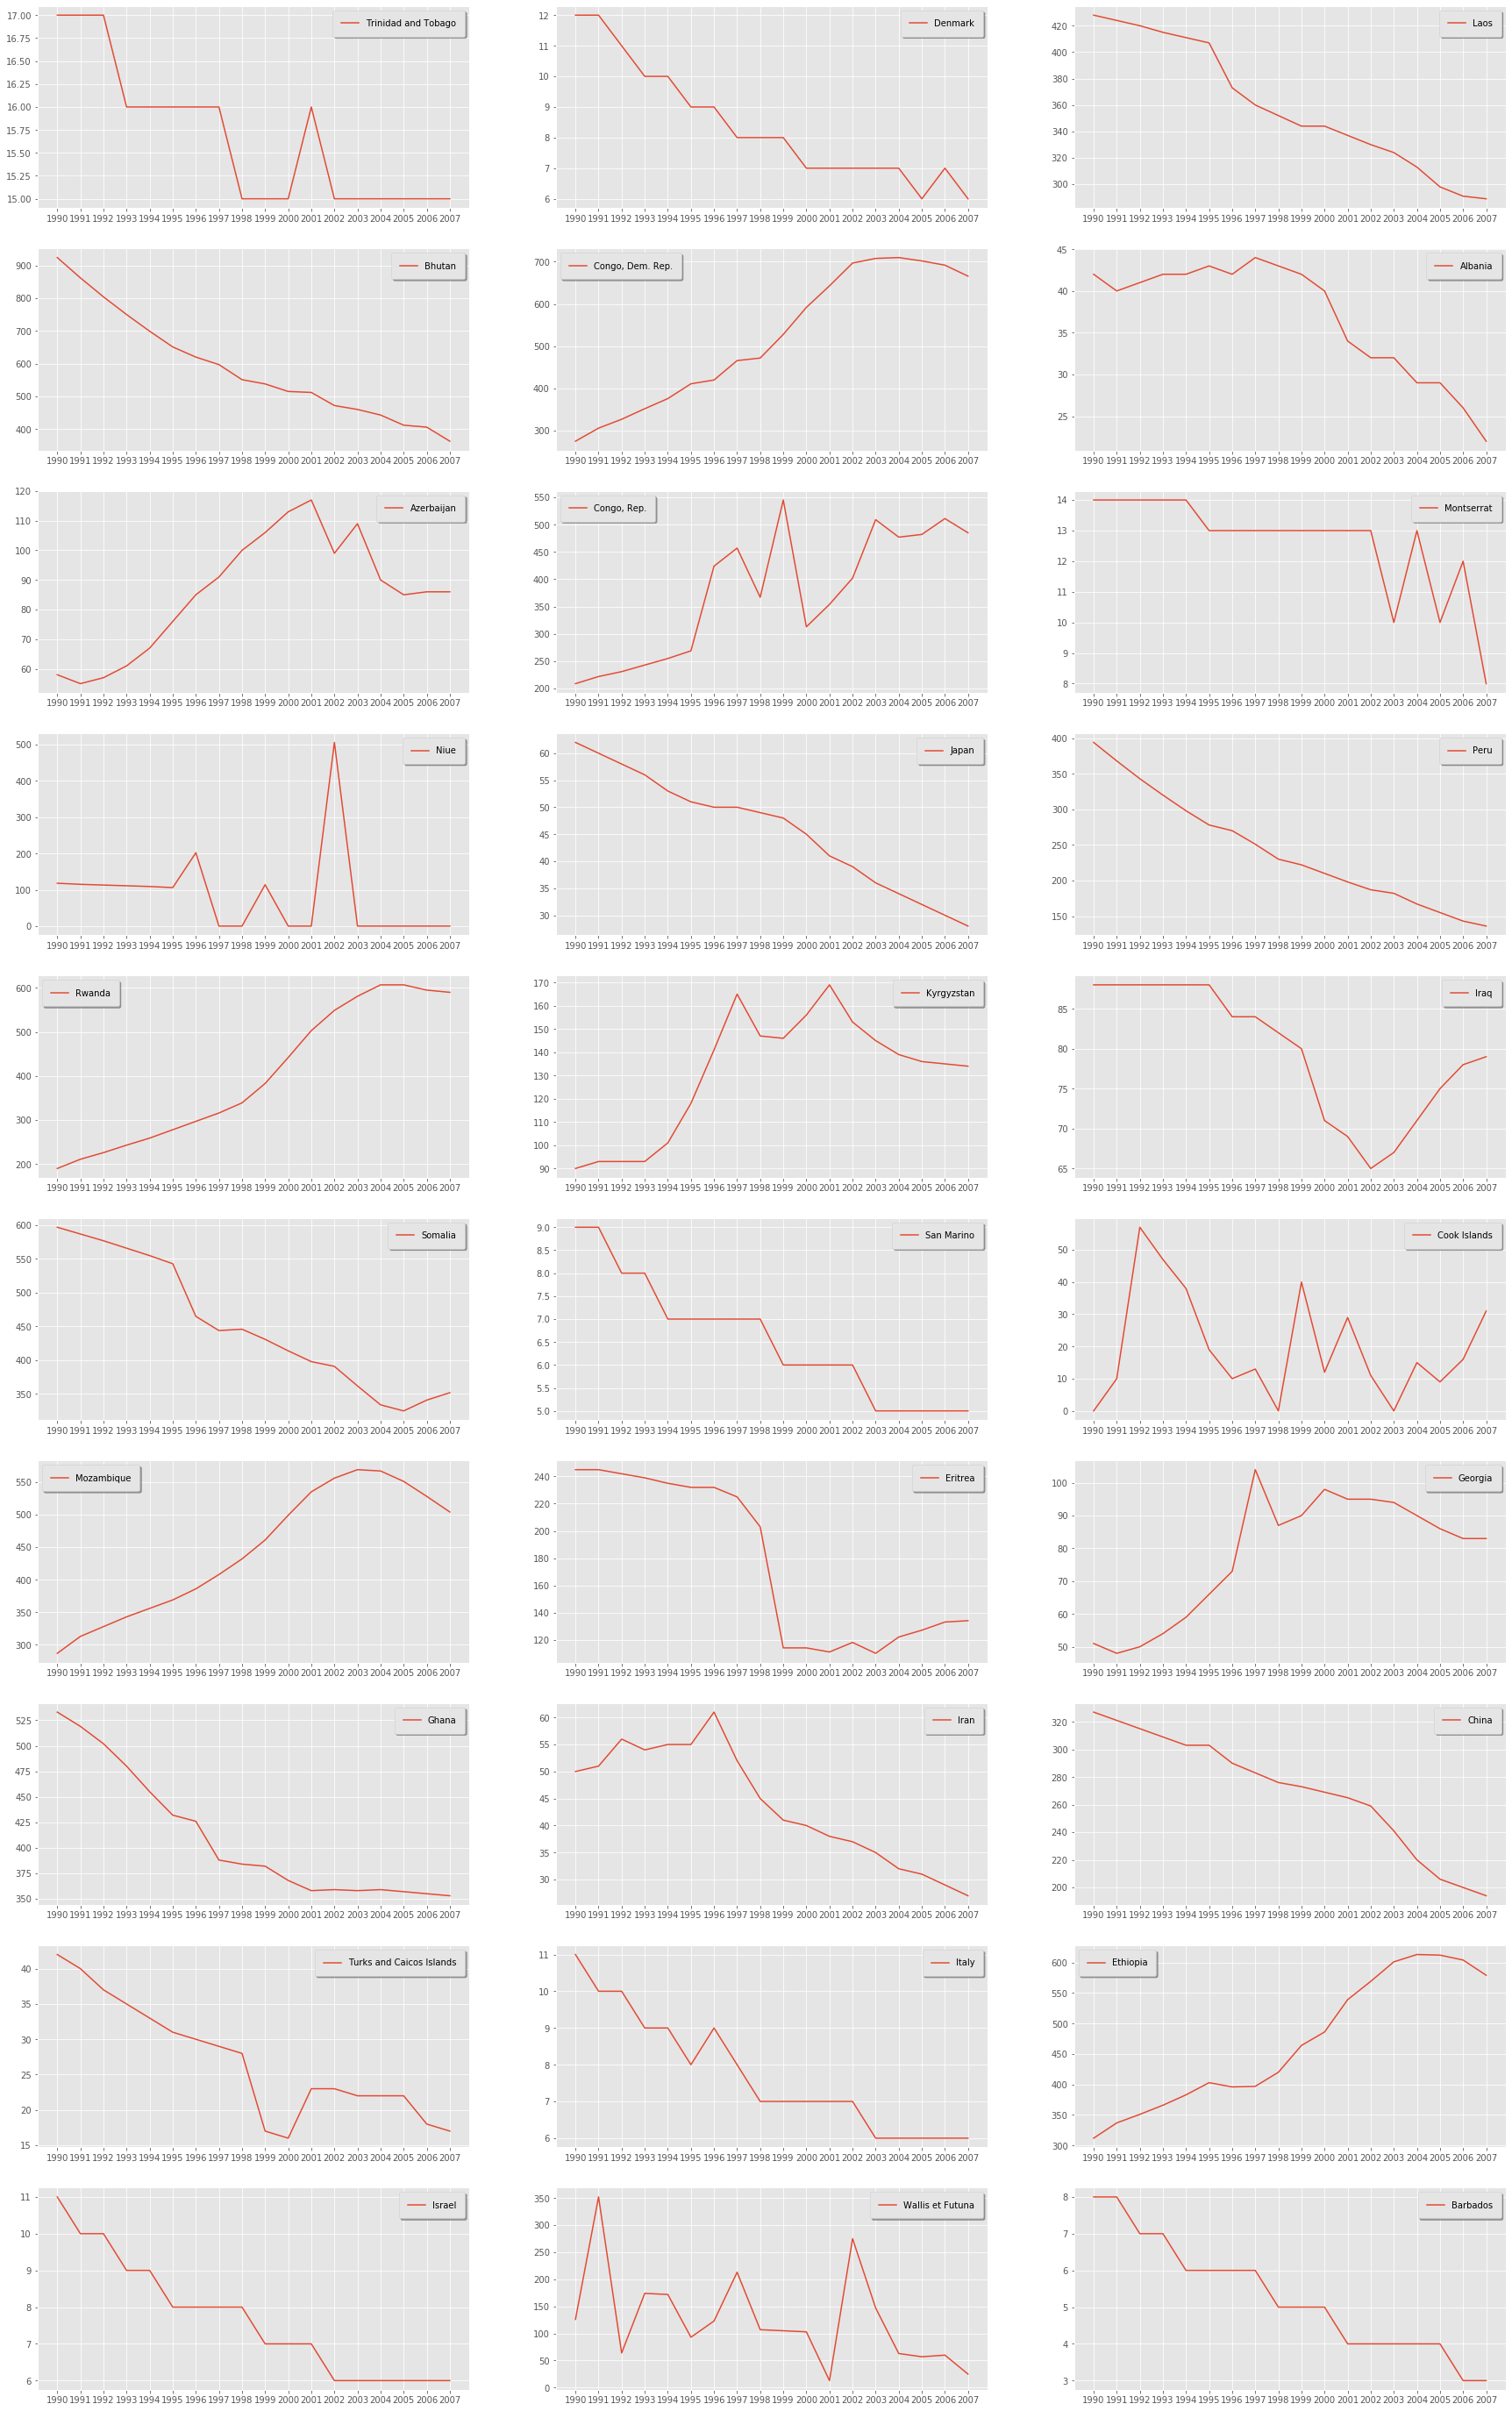

In [0]:
#Answer for question 1(1):


df1=df.sample(30)    #Taking 30 samples from data

Years= df.columns[0:18] #Separating Yearsfrom data
y = df1.iloc[: , 0:18].values #TB values
Country_name=df1.index # Separating Countries' names for plotting 
   
 # plotting of different 30 countries' TB data  
fig,axes = plt.subplots (nrows=10 , ncols=3,figsize=(30,50))
i=0
for row in axes:
  for col in row:
    col.plot(Years,y[i], label=Country_name[i])
    i=i+1
    col.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.style.use('ggplot')



### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[1]  
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5] -----> Principal components(Eigenvectors) represent direction of new feature space. Principal component is a new property of a given data. It could be a single property or a combination of properties of original TB data. These principal components have  maximum variance and minimum error to reconstruct our original data on new feature space.

In [0]:
  A = df.iloc[ : , 0:18].values
  A_std = StandardScaler().fit_transform(A)
  n, m = A_std.shape

# Compute covariance matrix
CV = np.dot(A_std.T, A_std) / (n-1) 
# or C = np.cov(A_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(CV) 

args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args] 

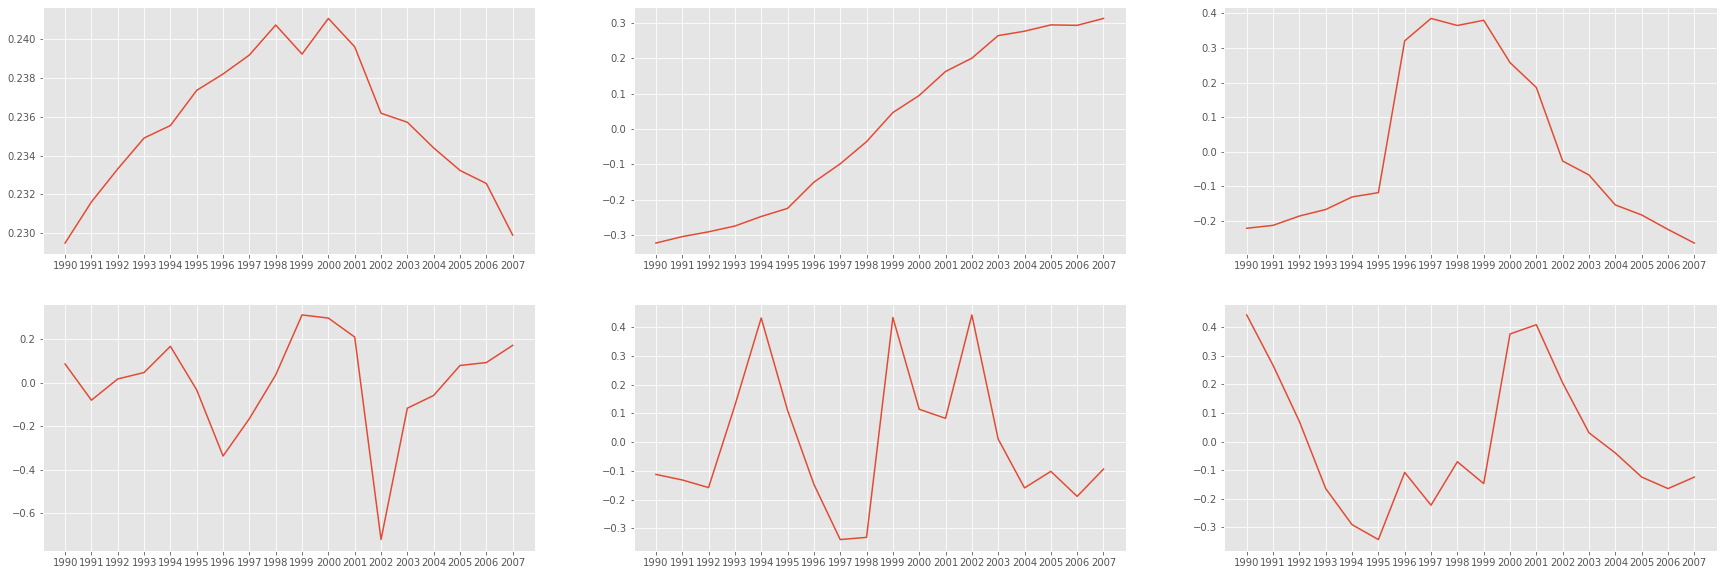

In [0]:
# Answer for question 2(1):

#plotting 6 PCA

PCA6 = eigenVectors[ : , 0:6] #selecting first 6 Eigenvectors(Principal Components)
Years= df.columns[0:18]


fig1,axes1 = plt.subplots (nrows=2 , ncols=3,figsize=(30,10))

j=0
for p in axes1:
  for q in p:    
    q.plot(Years,PCA6[ : , j])
    j+=1  

### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[1] 

2. Next, show its incremental reconstruction using the first 1-6 components (again plotted as a time series in a 3 plots/row format).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components.[1]

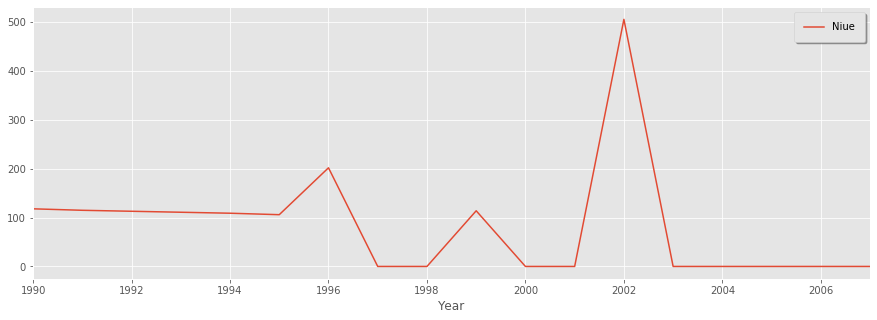

Year
1990    118
1991    115
1992    113
1993    111
1994    109
1995    106
1996    202
1997      0
1998      0
1999    114
2000      0
2001      0
2002    506
2003      0
2004      0
2005      0
2006      0
2007      0
Name: Niue, dtype: int64


In [0]:
#Answer for question 3(1):

#Interesting Data Sample of NIUE Country:

Interesting_country = df.iloc[133, : ]
Years= df.columns[0:18]
TB_Data = df.iloc[133, : ].values

# NIEU data plot
Interesting_country.plot(kind = 'line', x = 'Years', y= ' TB_Data', figsize = (15,5))
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
print(Interesting_country)


In [0]:
#Amswer of question 3(2):

mean_ = df.mean(axis=0).values.reshape(-1,1) #mean of dataframe
TB_Data1= TB_Data.reshape(-1,1) #reshaping selected country data

Y1 = np.dot (PCA6.T, TB_Data1 - mean_)


In [0]:
def project ( PCA6, TB_Data1, mean_):
    return np.dot (PCA6.T, TB_Data1 - mean_)
def reconstruct (PCA6, Y1, mean_) :
    return np.dot ( PCA6 , Y1) + mean_

In [0]:
# create reconstructed images
COUNT_= 6 # count of first eigenVectors used to reconstruct the image
recon_data = []
for numEvs_ in range (1, COUNT_+1):
    P_ = project(PCA6[:, 0:numEvs_], TB_Data1, mean_)
    R_= reconstruct(PCA6[:, 0:numEvs_], P_, mean_)
    recon_data.append(R_)   

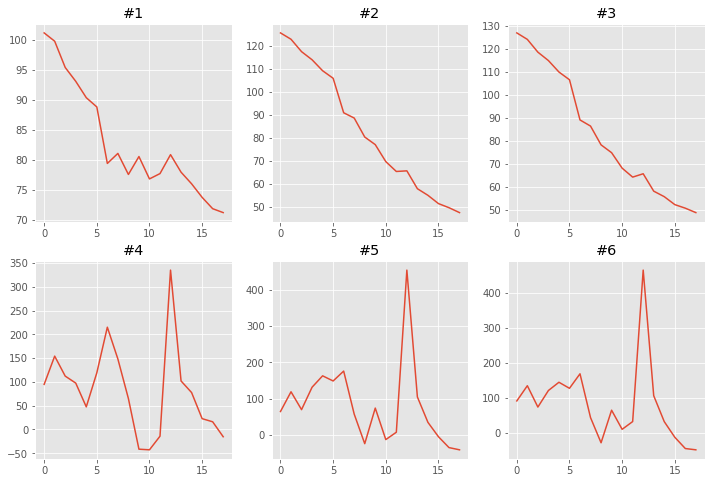

In [0]:
# plot reconstructed images
ROWS_ = math.ceil(COUNT_/3)
fig_ = plt.figure(figsize=(12, ROWS_ * 4))
for k in range(0,COUNT_):
    plt.subplot(ROWS_, 3, k+1)
    plt.plot(recon_data[k])
    plt.title('#{}'.format(k+1))

[118.02830158360337, 116.64870395813193, 116.64127730511015, 76.52343380268046, 43.4751033340593, 41.03783157518083]


Text(0.5, 1.0, 'RMSE OF THE RECONSTRUCTION FOR EACH OF THE 6 COMPONENTS')

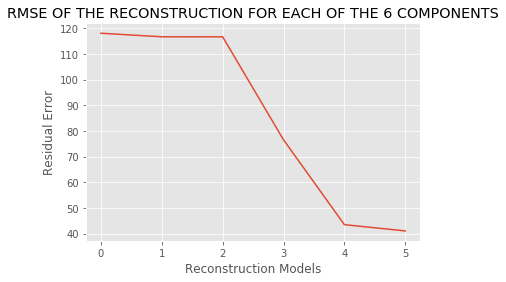

In [0]:
#Answer of question 3(3):

#RESIDUAL ERROR PLOT
re = []

for i in range(0,6):
  re.append(np.sqrt(np.square(np.subtract(TB_Data1,recon_data[i])).mean()))  #formula to find Root Mean Square Error 
  i+=1

print(re)

plt.plot(re)
plt.xlabel('Reconstruction Models')
plt.ylabel('Residual Error')
plt.title("RMSE OF THE RECONSTRUCTION FOR EACH OF THE 6 COMPONENTS") 



# We can see from the plot that RMSE decreases with our reconstruction models.
# This shows that with increase in principal components our data reconstructs well.

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[1]  
2. How many did you choose and why?[1] -----> I choose k = 3 because at k = 3, cumulative explained variance is 98.9. This represents that by reconstructing our data in new feature space with 3 principal component, it captures almost 99% of the data.  So it will give us minimum error and working with 3 dimension (3 feature) is easy compare to four or more than four dimensions. We can also choose k=2 but variance is 97.74 so reconstruction error increases compare to k=3. So for minimum error and ease in handling data I choose k=3.

Text(0, 0.5, 'eigenValues')

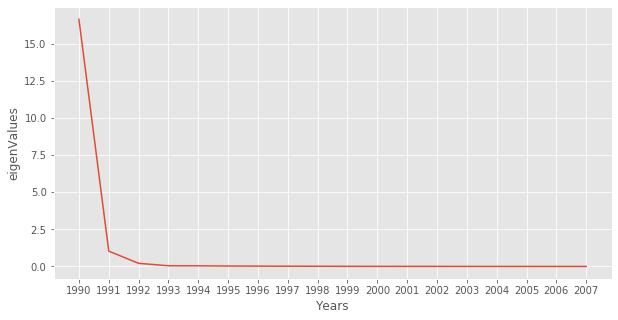

In [0]:
# Answer for question 4(1):

plt.figure(figsize=(10,5))
plt.plot(Years, eigenValues)
plt.xlabel("Years")
plt.ylabel("eigenValues")


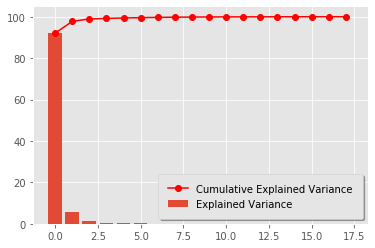

array([ 92.03977111,  97.74467407,  98.90913378,  99.16258184,
        99.39246981,  99.55243536,  99.6751039 ,  99.7639778 ,
        99.82947975,  99.87721587,  99.91009571,  99.93752202,
        99.96140791,  99.97587443,  99.98672718,  99.99368582,
        99.99782377, 100.        ])

In [0]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(18), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show() , cumExpVar

cumExpVar

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]

Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3.[1]

In [0]:
#Answer for question 5(1):

# mean(M) and standard deviation (Std) of Interesting (NIEU) Country 

mean_N = TB_Data.mean()
std_N = TB_Data.std()
print('Mean of NIEU Country data: ' , mean_N )
print('Standard Deviation of NIEU Country data: ' , std_N )

Mean of NIEU Country data:  83.0
Standard Deviation of NIEU Country data:  120.45976737299286


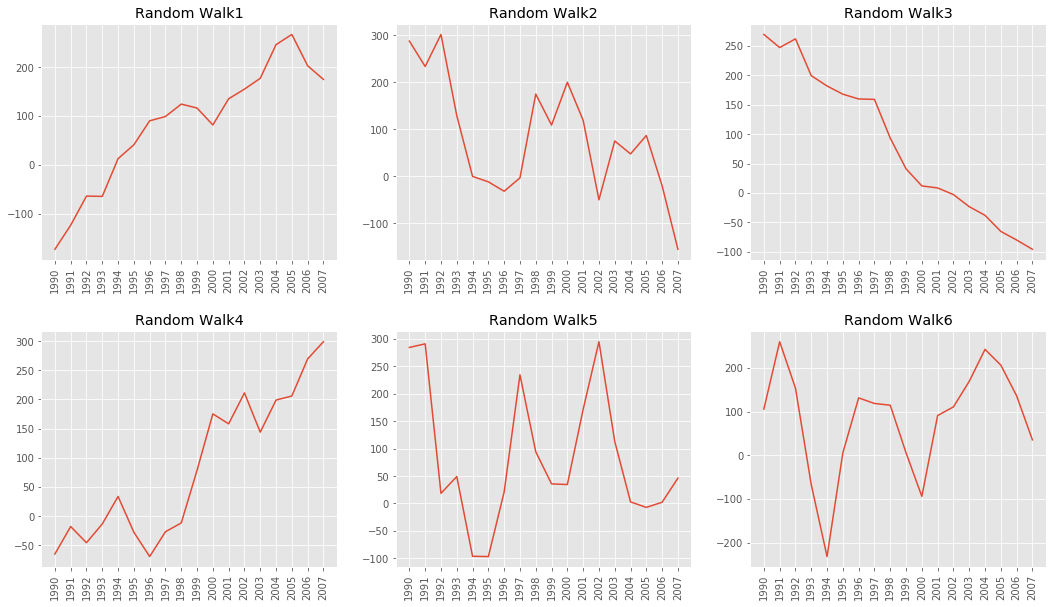

In [0]:
#Answer for question 5(2)(2):

#Random Walk (1):
a1 = np.random.normal(size=18)
data1 = np.cumsum(a1)
mean1=data1.mean()
std1=np.std(data1)
normal_data1 = (data1 - mean1)/std1
random_walk1 =  (normal_data1*std_N)+mean_N

#Random Walk(2):
a2 = np.random.normal(size=18)
data2 = np.cumsum(a2)
mean2=data2.mean()
std2=data2.std()
normal_data2 = (data2 - mean2)/std2
random_walk2 =  (normal_data2*std_N)+mean_N

#Random Walk(3):
a3 = np.random.normal(size=18)
data3 = np.cumsum(a3)
mean3=data3.mean()
std3=data3.std()
normal_data3 = (data3 - mean3)/std3
random_walk3 =  (normal_data3*std_N)+mean_N

#Random Walk(4):
a4 = np.random.normal(size=18)
data4 = np.cumsum(a4)
mean4=data4.mean()
std4=data4.std()
normal_data4 = (data4 - mean4)/std4
random_walk4 =  (normal_data4*std_N)+mean_N

#Random Walk(5):
a5 = np.random.normal(size=18)
data5 = np.cumsum(a5)
mean5=data5.mean()
std5=data5.std()
normal_data5 = (data5 - mean5)/std5
random_walk5 =  (normal_data5*std_N)+mean_N

#Random Walk(6):
a6 = np.random.normal(size=18)
data6 = np.cumsum(a6)
mean6=data6.mean()
std6=data6.std()
normal_data6 = (data6 - mean6)/std6
random_walk6 =  (normal_data6*std_N)+mean_N

random_walk = [random_walk1,random_walk2,random_walk3,random_walk4,random_walk5,random_walk6] #making a list to use for plotting

random_walk_df = pd.DataFrame(random_walk)  #constructing data in a dataframe to find its mean
mu_random_walk = random_walk_df.mean(axis = 0).values.reshape(-1,1) #mean of random walk data

plt.figure(figsize=(18,10))

for r in range (0,6):
  
  plt.subplot(2,3,r+1)
  plt.xticks(rotation=90)
  plt.plot(Years, random_walk[r])
  
  r=r+1
  plt.title('Random Walk{}'.format(r))
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


In [0]:
#Answer for question 5(2)(1):

# sample reandom walk 
print( 'Sample Random Walk mean :' , random_walk3.mean())
print( 'Sample Random Walk Standard Deviation :' , random_walk3.std())

# it is same as my sample country.


Sample Random Walk mean : 83.0
Sample Random Walk Standard Deviation : 120.45976737299286


In [0]:
#Answer for question 5(3):

K3 = eigenVectors[ : , 0:3]  #selecting first 3 eigenvectors(Principal Components)
 
random_walk1r= random_walk1.reshape(-1,1) #Reshaping random walk1 data
random_walk2r= random_walk2.reshape(-1,1) #Reshaping random walk2 data
random_walk3r= random_walk3.reshape(-1,1) #Reshaping random walk3 data
random_walk4r= random_walk4.reshape(-1,1) #Reshaping random walk4 data
random_walk5r= random_walk5.reshape(-1,1) #Reshaping random walk5 data
random_walk6r= random_walk6.reshape(-1,1) #Reshaping random walk6 data


In [0]:
#Reconstruction of Random walk1

pro1 = np.dot (E ,random_walk1r - mu_random_walk )

def project ( K3, random_walk1r, mu_random_walk):
    return np.dot (K3.T , random_walk1r - mu_random_walk )
def reconstruct ( K3, pro1, mu_random_walk) :
    return np.dot ( K3 , pro1) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data1 = []
for numEvs1 in range (1, COUNT1+1):
    P1 = project(K3[:, 0:numEvs1], random_walk1r, mu_random_walk)
    R1 = reconstruct(K3[:, 0:numEvs1], P1, mu_random_walk)
    recon_data1.append(R1)

#RMSE
re1 = np.sqrt(np.square(np.subtract(random_walk1r,recon_data1)).mean())
print('RMSE for first random walk : ', re1)

RMSE for first random walk :  87.61902924794867


In [0]:
#Reconstruction of Random walk2

pro2 = np.dot (K3.T , random_walk2r - mu_random_walk )

def project ( K3, random_walk2r, mu_random_walk):
    return np.dot (K3.T , random_walk2r - mu_random_walk )
def reconstruct ( K3, pro2, mu_random_walk) :
    return np.dot ( K3 , pro2) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data2 = []
for numEvs2 in range (1, COUNT1+1):
    P2 = project(K3[:, 0:numEvs2], random_walk2r, mu_random_walk)
    R2 = reconstruct(K3[:, 0:numEvs2], P2, mu_random_walk)
    recon_data2.append(R2)

#RMSE
re2 = np.sqrt(np.square(np.subtract(random_walk2r,recon_data2)).mean())
print('RMSE for second random walk : ', re2)

RMSE for second random walk :  86.83581508147739


In [0]:
#Reconstruction of Random walk3

pro3 = np.dot (K3.T , random_walk3r - mu_random_walk)

def project ( K3, random_walk3r, mu_random_walk):
    return np.dot (K3.T , random_walk3r - mu_random_walk)
def reconstruct ( K3, pro3, mu_random_walk) :
    return np.dot ( K3 , pro3) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data3 = []
for numEvs3 in range (1, COUNT1+1):
    P3 = project(K3[:, 0:numEvs3], random_walk3r, mu_random_walk)
    R3 = reconstruct(K3[:, 0:numEvs3], P3, mu_random_walk)
    recon_data3.append(R3)

    
#RMSE
re3 = np.sqrt(np.square(np.subtract(random_walk3r,recon_data3)).mean())
print('RMSE for third random walk : ', re3)

RMSE for third random walk :  74.01835244548288


In [0]:
#Reconstruction of Random walk4

pro4 = np.dot (K3.T , random_walk4r - mu_random_walk)

def project ( K3, random_walk4r, mu_random_walk):
    return np.dot (K3.T , random_walk4r - mu_random_walk)
def reconstruct ( K3, pro4, mu_random_walk) :
    return np.dot ( K3 , pro4) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data4 = []
for numEvs4 in range (1, COUNT1+1):
    P4 = project(K3[:, 0:numEvs4], random_walk4r, mu_random_walk)
    R4 = reconstruct(K3[:, 0:numEvs4], P4, mu_random_walk)
    recon_data4.append(R4)


  
#RMSE
re4 = np.sqrt(np.square(np.subtract(random_walk4r,recon_data4)).mean())
print('RMSE for fourth random walk : ', re4)

RMSE for fourth random walk :  63.720111154155354


In [0]:
#Reconstruction of Random walk5

pro5 = np.dot (K3.T , random_walk5r - mu_random_walk)

def project ( K3, random_walk5r, mu_random_walk):
    return np.dot (K3.T , random_walk5r - mu_random_walk)
def reconstruct ( K3, pro5, mu_random_walk) :
    return np.dot ( K3 , pro5) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data5 = []
for numEvs5 in range (1, COUNT1+1):
    P5 = project(K3[:, 0:numEvs5], random_walk5r, mu_random_walk)
    R5 = reconstruct(K3[:, 0:numEvs5], P5, mu_random_walk)
    recon_data5.append(R5)

#RMSE
re5 = np.sqrt(np.square(np.subtract(random_walk5r,recon_data5)).mean())
print('RMSE for fifth random walk : ', re5)

RMSE for fifth random walk :  63.70509585991531


In [0]:
#Reconstruction of Random walk6

pro6 = np.dot (K3.T , random_walk6r - mu_random_walk)

def project ( K3, random_walk6r, mu_random_walk):
    return np.dot (K3.T , random_walk6r - mu_random_walk)
def reconstruct ( K3, pro6, mu_random_walk) :
    return np.dot ( K3 , pro6) + mu_random_walk

# create reconstructed images
COUNT1 = 3 # count of first eigenVectors used to reconstruct the image
recon_data6 = []
for numEvs6 in range (1, COUNT1+1):
    P6 = project(K3[:, 0:numEvs6], random_walk6r, mu_random_walk)
    R6 = reconstruct(K3[:, 0:numEvs6], P6, mu_random_walk)
    recon_data6.append(R6)

#RMSE
re6 = np.sqrt(np.square(np.subtract(random_walk6r,recon_data6)).mean())   
print('RMSE for sixth random walk : ', re6) 

RMSE for sixth random walk :  47.93392935393461


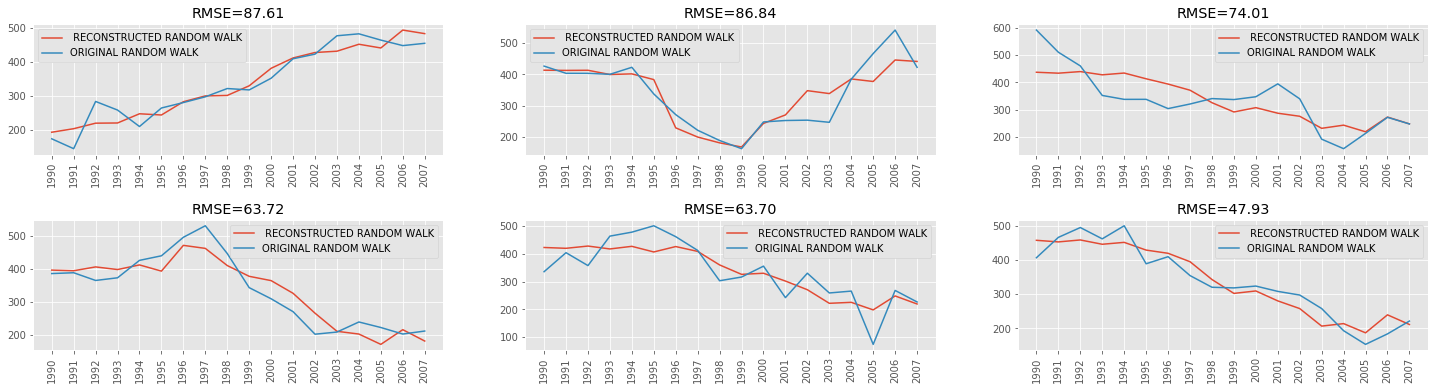

In [0]:
#plot reconstructed images of random walks

reconstructed_random_walk = [recon_data1[2],recon_data2[2],recon_data3[2],recon_data4[2],recon_data5[2],recon_data6[2]]
ResidualErrors = ['RMSE=87.61','RMSE=86.84','RMSE=74.01','RMSE=63.72','RMSE=63.70','RMSE=47.93']
ResidualErrors = np.array(ResidualErrors)

COUNT_ = 6
ROWS_ = math.ceil(COUNT_/3)

fig_ = plt.figure(figsize=(25, ROWS_ * 3))
for k in range(0,COUNT_):
    plt.subplot(ROWS_, 3, k+1)
    plt.plot(reconstructed_random_walk[k], label= " RECONSTRUCTED RANDOM WALK")
    plt.plot(Years, random_walk[k], label= "ORIGINAL RANDOM WALK")
    plt.title(label = ResidualErrors[k])
    plt.legend(framealpha=1, frameon=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    plt.xticks(rotation=90)




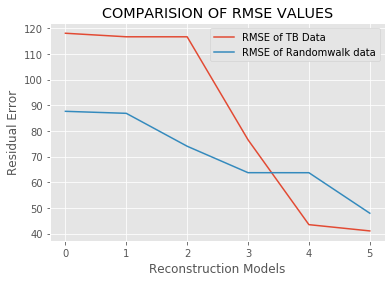

In [0]:
#Answer of question 5(4):

#Comparing RMSE values
ResidualErrors_values = [re1,re2,re3,re4,re5,re6]

re = []

for i in range(0,6):
  re.append(np.sqrt(np.square(np.subtract(TB_Data1,recon_data[i])).mean()))
  i+=1



plt.plot(re, label= "RMSE of TB Data")
plt.plot(ResidualErrors_values , label = "RMSE of Randomwalk data")
plt.xlabel('Reconstruction Models')
plt.ylabel('Residual Error')
plt.title("COMPARISION OF RMSE VALUES")
plt.legend(framealpha=1, frameon=True)

### Question 6

Explain how could you use PCA to do anomaly detection.[1]
-----> PCA is well known unsupervised dimension reduction method which determines principal directions of the feature data distribution. If there are outliers present in our dataset then it will significantly affect principal directions/ Principal components (Eigenvectors) and this will produce remarkable variation in Principal components. 
       This function of variation we can use to find outliers in our data.When we reconstruct our data in to new feature space, these outliers will give us large error compare to our normal data. 
       So steps to use PCA in anomaly Detection:
       1) First find prncipal components and eigenvalues of dataset
       2) Choose optimal number of principal components  which give us maximum variance
       3) Project and reconstruct dataset in to new feature space using                   selected number of principal components
       4) Outliers will give us high error compare to normal data
       5) This error should not be so low or so high that we can not                      distinguish between anomaly and our normal data. For that we need to            choose optimal number of Principal components which provide us high            precision and recall during reconstruction.


## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi